- Paso 1: Realiza un countplot mostrando la frecuencia de cada una de las evaluaciones: 1, 2, 3, 4 o 5 estrellas.

- Paso 2: Genera una matriz donde los renglones sean las peliculas y las columnas los usuarios, cada celda debe contener la evaluación que da el usuario a la pelicula. Genera y muestra un dataframe con esta información, es importante poner el index con el nombre de las peliculas.

- Paso 3: Calcula e imprime el número de evaluaciones de cada una de las peliculas.

- Paso 4: Genera un boxplot y un histograma con el número de evaluaciones de las peliculas.

- Paso 5: Realiza una gráfica de pastel con el número de evaluaciones de las 5 películas con mayor número de evaluaciones, debes mostrar el nombre de las películas.

- Paso 6: Calcula e imprime el promedio de las calificaciones de cada una de las peliculas. Ojo: sólo debes tomar las evaluaciones realizadas (hay usuarios que no evaluaron peliculas y eso no es lo mismo a un 0).

- Paso 7: Realiza una gráfica de barras de las calificaciones promedio de las 5 peliculas con mayor promedio de calificación, debes mostrar el nombre de las películas.

- Paso 8: Realiza una gráfica de barras con el promedio de calificación de las 10 peliculas con mayor número de evaluaciones, debes mostrar el nombre de las películas.

- Paso 9: Calcula e imprime los estadísticos (min, max, promedio, desv estándar) de número de evaluaciones realizadas por tipo de usuario (programadores, cientìficos, etc.)

- Paso 10: Realiza una gráfica que tenga tantos boxplot como tipo de usuarios. Cada boxplot debe representar los números de evaluaciones de esos tipos de usuarios.

- Desde tu punto de vista, ¿Cuáles son las peliculas que más les gustan a los usuarios? Indica que valores numéricos o gráficas sustentan tu respuesta.

- Si fueras dueño de una plataforma de streaming de peliculas, ¿Cuàles son las peliculas que eliminarías del catálogo? ¿Por qué? Indica que valores numéricos o gráficas sustentan tu respuesta.

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
import numpy as np
import statistics as st
from collections import Counter

In [47]:
general_url = '../../datasets/peliculas'

client_url = general_url+'/Clientes_descripcion.txt'
movies_url = general_url+'/Peliculas_descripcion.txt'
rating_url = general_url+'/Peliculas_Clientes.txt'

client = pd.read_csv(client_url, delimiter='|', header=None)
movies = pd.read_csv(movies_url, delimiter='|', header=None)
rating = pd.read_csv(rating_url, delim_whitespace=True, header=None)

client = client.drop(client.iloc[:,4:5],axis=1)

movies = movies.drop(movies.iloc[:,3:5], axis=1)
movies = movies.drop(movies.iloc[:,3:], axis=1)

rating = rating.drop(rating.iloc[:,3:4], axis=1)

client_columns = ['id','age','sex','profession']
client.columns = client_columns

movies_columns = ['id','name','release_date']
movies.columns = movies_columns

rating_columns = ['id_client','id_movies','rating']
rating.columns = rating_columns

client

,id,age,sex,profession
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
...,...,...,...,...
938,939,26,F,student
939,940,32,M,administrator
940,941,20,M,student
941,942,48,F,librarian


In [48]:
movies

,id,name,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995
...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998
1678,1679,B. Monkey (1998),06-Feb-1998
1679,1680,Sliding Doors (1998),01-Jan-1998
1680,1681,You So Crazy (1994),01-Jan-1994


In [49]:
rating

,id_client,id_movies,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


- Paso 1: Realiza un countplot mostrando la frecuencia de cada una de las evaluaciones: 1, 2, 3, 4 o 5 estrellas.

<AxesSubplot:xlabel='rating', ylabel='count'>

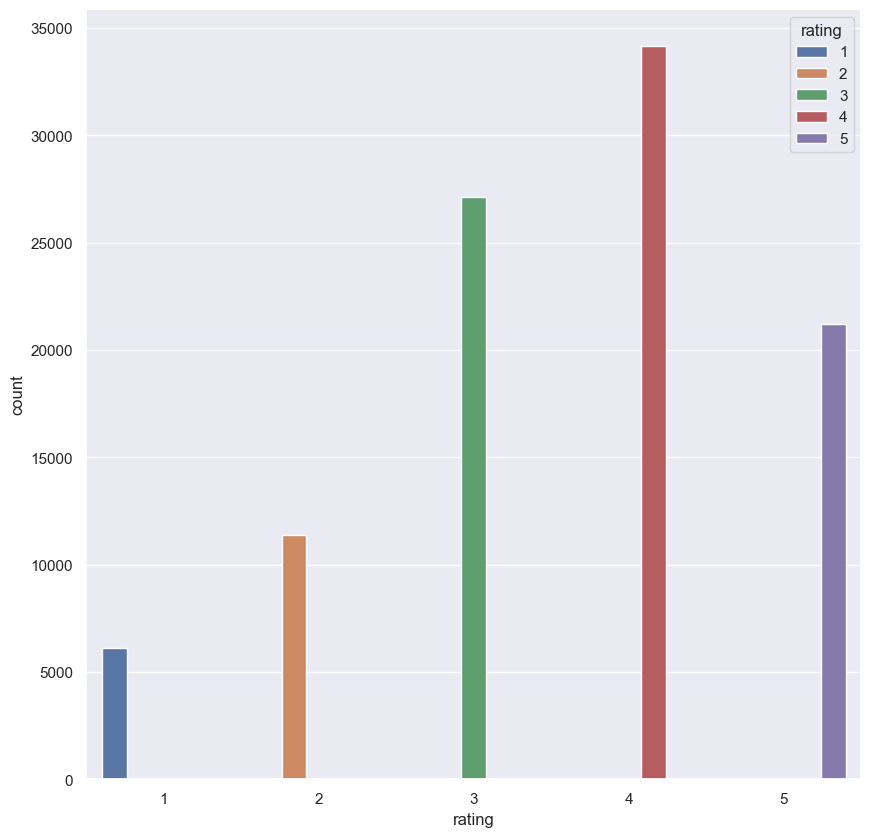

In [50]:
sns.set()

figure,axis = plt.subplots(figsize=(10,10))

sns.countplot(x='rating',hue='rating',data=rating,ax=axis)

- Paso 2: Genera una matriz donde los renglones sean las peliculas y las columnas los usuarios, cada celda debe contener la evaluación que da el usuario a la pelicula. Genera y muestra un dataframe con esta información, es importante poner el index con el nombre de las peliculas.

In [77]:
pre_df = []

#pre_df.append(client.id.values);
#pre_df[0] = [0]+pre_df[0]

for idm,_ in enumerate(movies.id):
    movie_name = movies.name.values[idm]

    pre_df.append(np.zeros(client.id.values.size))
    #pre_df[idm] = [idm]+pre_df[idm]

for idu,user in enumerate(rating.id_client.values):
    current_rating = rating.rating.values[idu]
    current_movie = rating.id_movies.values[idu]

    pre_df[current_movie-1][user-1] = current_rating

clients_movies = pd.DataFrame(pre_df)
clients_movies.insert(0,'movie', movies.name.values)

clients_movies

,movie,0,1,2,3,4,5,6,7,8,...,933,934,935,936,937,938,939,940,941,942
0,Toy Story (1995),5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,GoldenEye (1995),3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,Four Rooms (1995),4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Get Shorty (1995),3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,Copycat (1995),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,Mat' i syn (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1678,B. Monkey (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,Sliding Doors (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,You So Crazy (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Paso 3: Calcula e imprime el número de evaluaciones de cada una de las peliculas.

In [87]:
evaluation_counter = Counter(rating.id_movies);
evaluation_counter_sorted = sorted(evaluation_counter.items())

print("Evaluaciones por pelicula")
for idm,amount in evaluation_counter_sorted:
    print(movies.name.values[idm-1],': ',amount)

Evaluaciones por pelicula
Toy Story (1995) :  452
GoldenEye (1995) :  131
Four Rooms (1995) :  90
Get Shorty (1995) :  209
Copycat (1995) :  86
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) :  26
Twelve Monkeys (1995) :  392
Babe (1995) :  219
Dead Man Walking (1995) :  299
Richard III (1995) :  89
Seven (Se7en) (1995) :  236
Usual Suspects, The (1995) :  267
Mighty Aphrodite (1995) :  184
Postino, Il (1994) :  183
Mr. Holland's Opus (1995) :  293
French Twist (Gazon maudit) (1995) :  39
From Dusk Till Dawn (1996) :  92
White Balloon, The (1995) :  10
Antonia's Line (1995) :  69
Angels and Insects (1995) :  72
Muppet Treasure Island (1996) :  84
Braveheart (1995) :  297
Taxi Driver (1976) :  182
Rumble in the Bronx (1995) :  174
Birdcage, The (1996) :  293
Brothers McMullen, The (1995) :  73
Bad Boys (1995) :  57
Apollo 13 (1995) :  276
Batman Forever (1995) :  114
Belle de jour (1967) :  37
Crimson Tide (1995) :  154
Crumb (1994) :  81
Desperado (1995) :  97
Doom Generation, Th

- Paso 4: Genera un boxplot y un histograma con el número de evaluaciones de las peliculas.

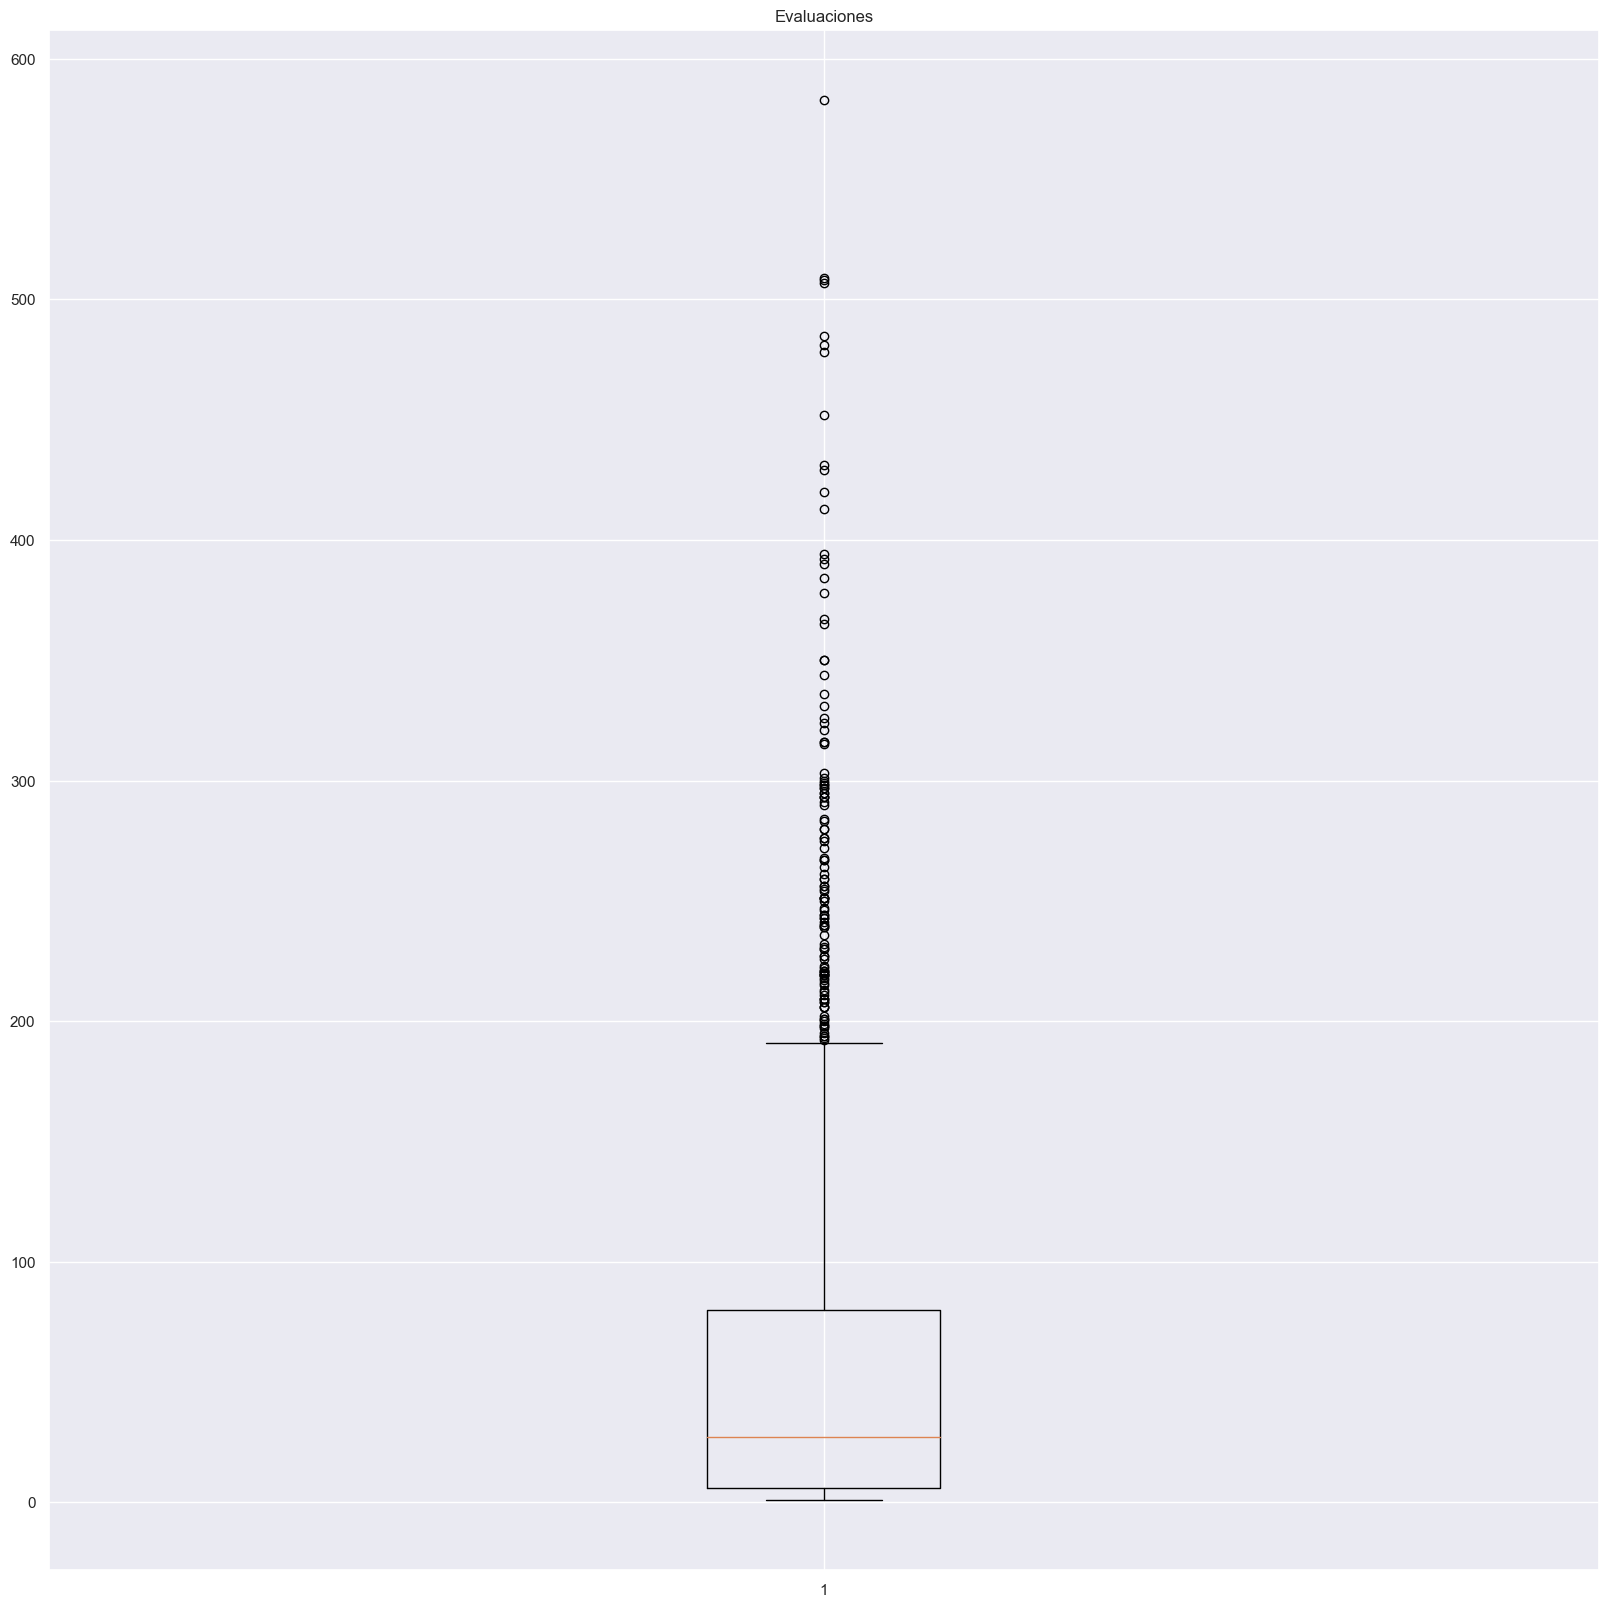

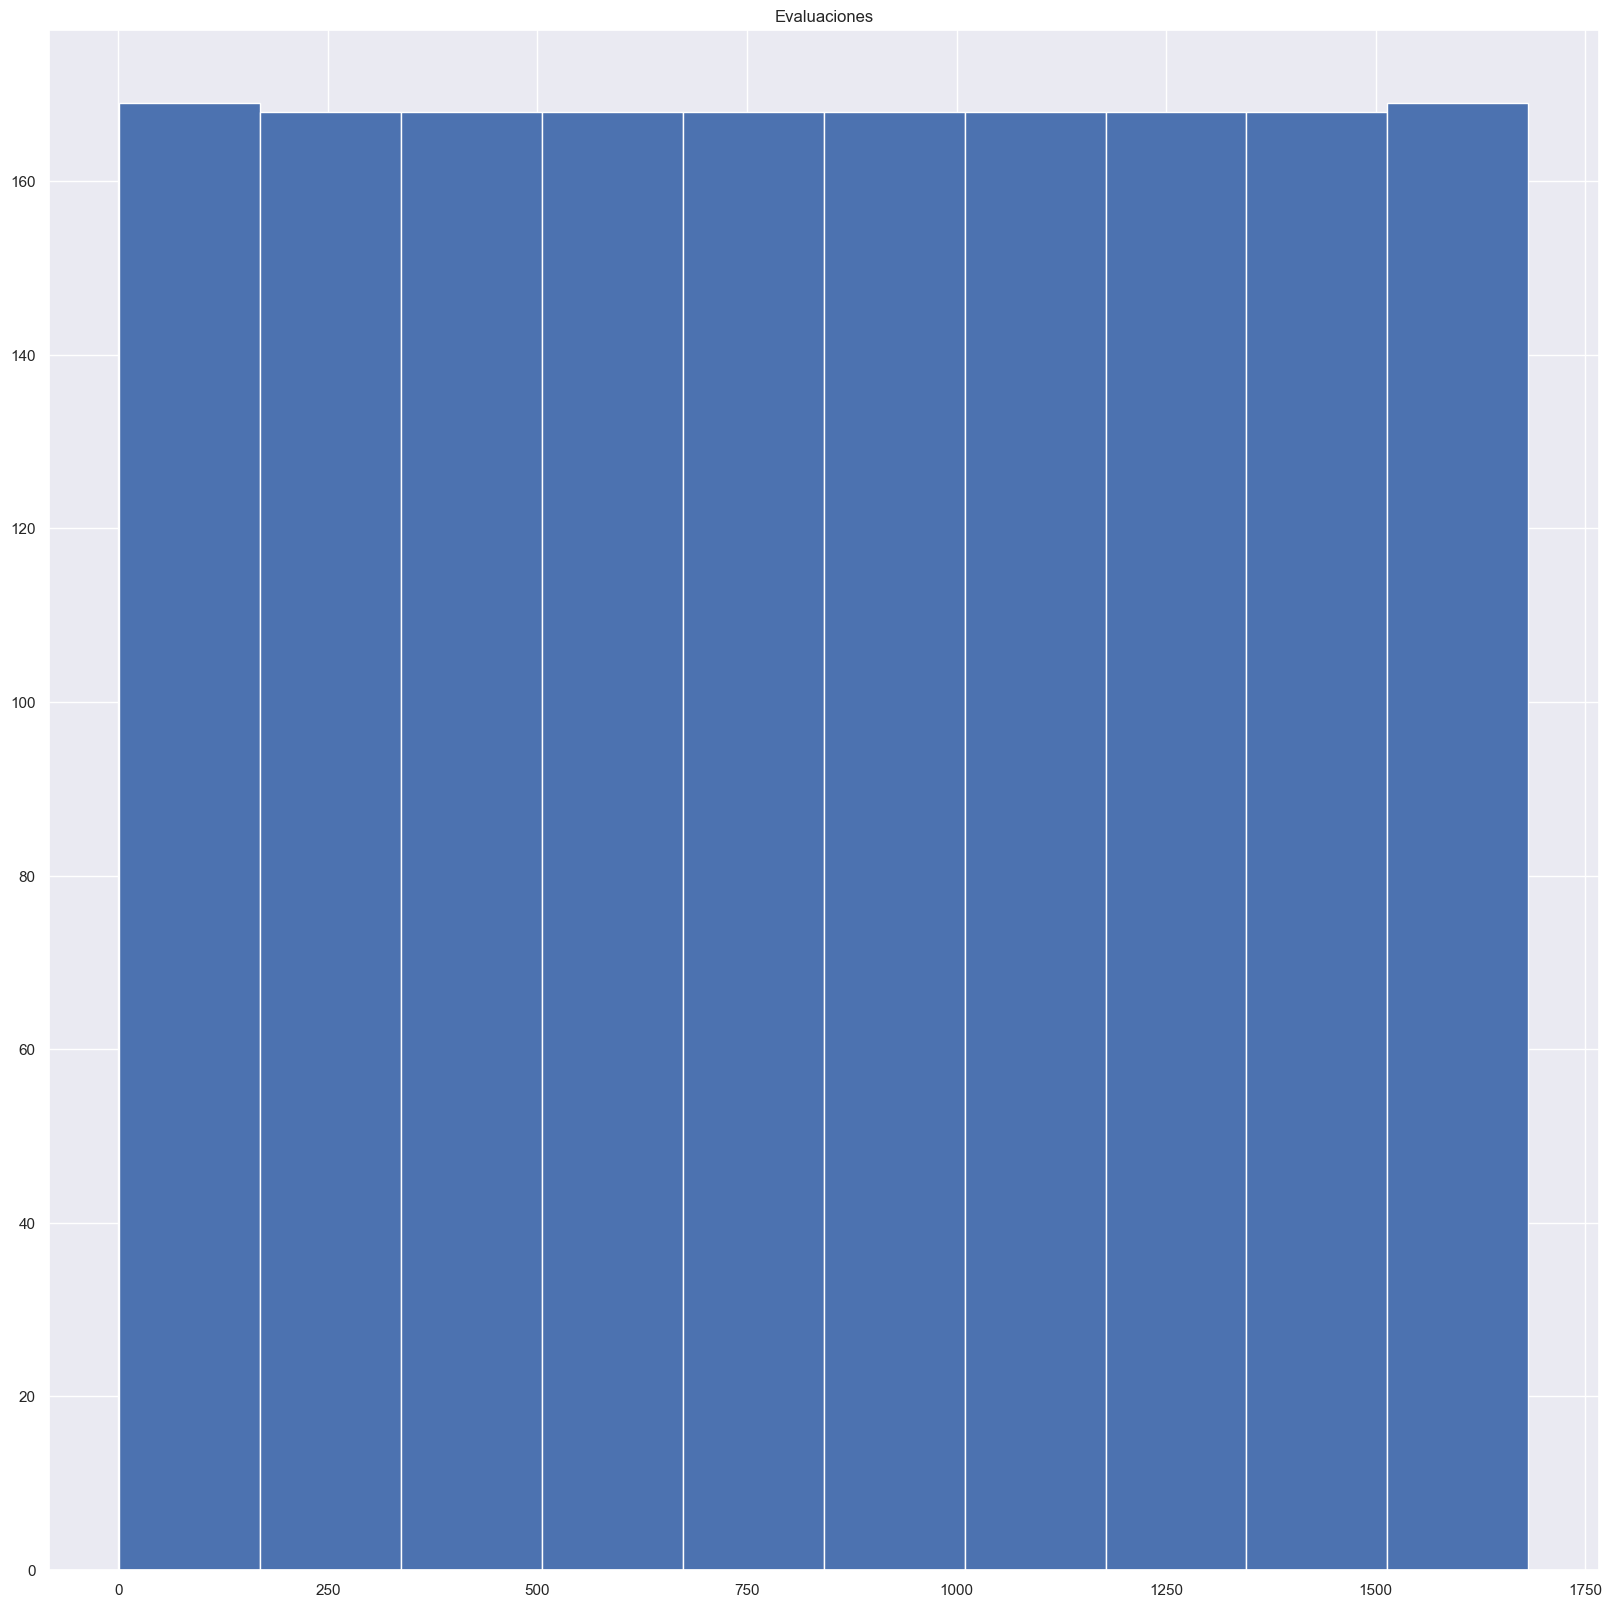

In [108]:
figure,axis = plt.subplots(figsize=(20,20))
plt.title("Evaluaciones")
axis.boxplot(evaluation_counter.values())

figure,axis = plt.subplots(figsize=(20,20))
plt.title("Evaluaciones")
axis.hist(evaluation_counter)

plt.show()

- Paso 5: Realiza una gráfica de pastel con el número de evaluaciones de las 5 películas con mayor número de evaluaciones, debes mostrar el nombre de las películas.

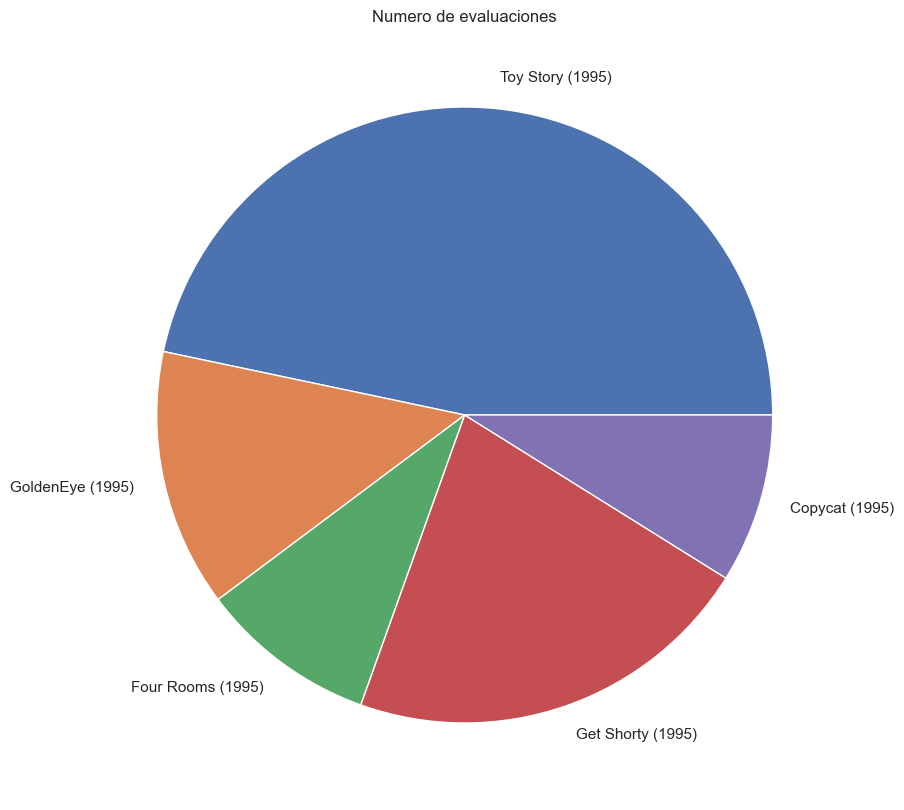

In [109]:
best5_movies = evaluation_counter_sorted[:5]
best5_movies_scores = [best5_movies[i][1] for i in range(0,5)]
best5_movies_labels = [movies.name.values[best5_movies[i][0]-1]
                       for i in range(0,5)]

figure,axis = plt.subplots(figsize=(10,10))
plt.title("Numero de evaluaciones")
axis.pie(best5_movies_scores,labels=best5_movies_labels)

plt.show()

- Paso 6: Calcula e imprime el promedio de las calificaciones de cada una de las peliculas. Ojo: sólo debes tomar las evaluaciones realizadas (hay usuarios que no evaluaron peliculas y eso no es lo mismo a un 0).

In [165]:
average_rating = {round(sum(clients_movies.iloc[i, 1:])/evaluation_counter[i+1],2):movie
                  for i,movie in enumerate(clients_movies.movie)}

average_rating

{3.88: 'Ruling Class, The (1972)',
 3.21: "Gridlock'd (1997)",
 3.03: 'Eye for an Eye (1996)',
 3.55: 'Sum of Us, The (1994)',
 3.3: 'Bitter Moon (1992)',
 3.58: "Widows' Peak (1994)",
 3.8: 'Stripes (1981)',
 4.0: 'Mamma Roma (1962)',
 3.9: 'Love in the Afternoon (1957)',
 3.83: 'Farewell to Arms, A (1932)',
 3.85: 'Walkabout (1971)',
 4.39: 'Rear Window (1954)',
 3.42: 'Man in the Iron Mask, The (1998)',
 3.97: 'Beautiful Thing (1996)',
 3.78: 'Blue Angel, The (Blaue Engel, Der) (1930)',
 3.12: 'Full Speed (1996)',
 2.8: 'Amazing Panda Adventure, The (1995)',
 3.96: "Ulee's Gold (1997)",
 2.76: 'Great White Hype, The (1996)',
 4.15: 'Thin Man, The (1934)',
 4.12: 'A Chef in Love (1996)',
 3.45: 'Bottle Rocket (1996)',
 3.44: 'Fast, Cheap & Out of Control (1997)',
 3.11: 'Last Dance (1996)',
 3.93: 'Enchanted April (1991)',
 2.67: 'It Takes Two (1995)',
 3.95: 'Cat on a Hot Tin Roof (1958)',
 3.63: 'Manhattan Murder Mystery (1993)',
 3.79: 'Trust (1990)',
 2.71: 'Horse Whisperer, The 

- Paso 7: Realiza una gráfica de barras de las calificaciones promedio de las 5 peliculas con mayor promedio de calificación, debes mostrar el nombre de las películas.

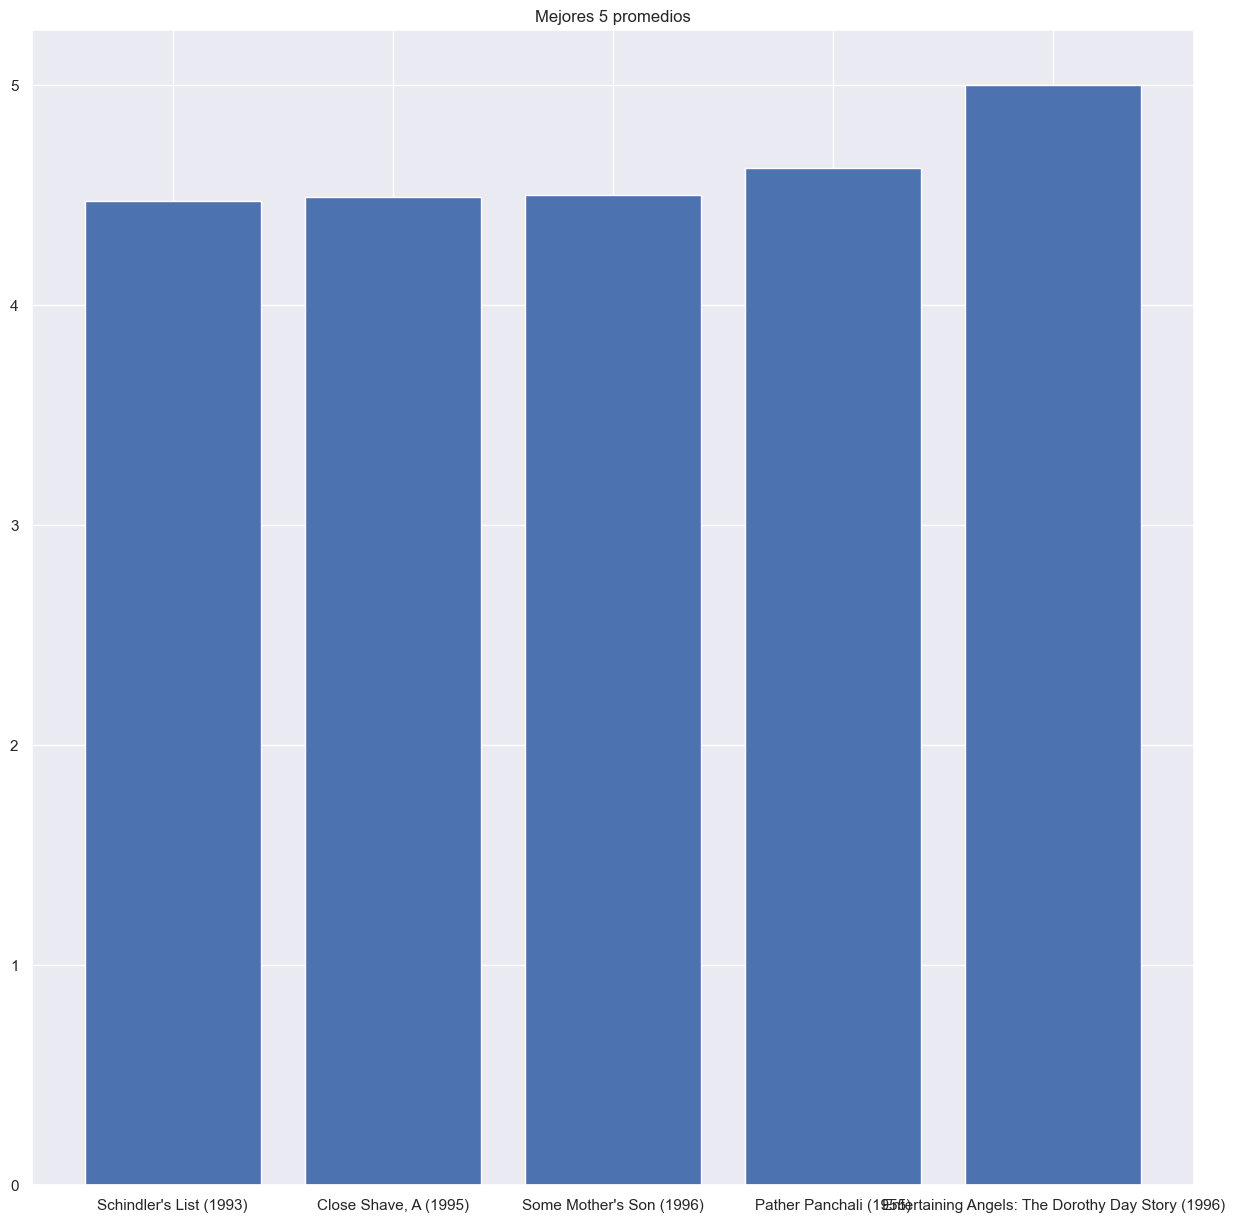

In [158]:
average_rating_sorted = sorted(average_rating.items())

best5_average = average_rating_sorted[-5:]

best5_average_scores = [best5_average[i][0] for i in range(0,5)]
best5_average_labels = [best5_average[i][1]
                       for i in range(0,5)]

figure,axis = plt.subplots(figsize=(15,15))
plt.title("Mejores 5 promedios")
axis.bar(best5_average_labels,best5_average_scores)

plt.show()

- Paso 8: Realiza una gráfica de barras con el promedio de calificación de las 10 peliculas con mayor número de evaluaciones, debes mostrar el nombre de las películas.

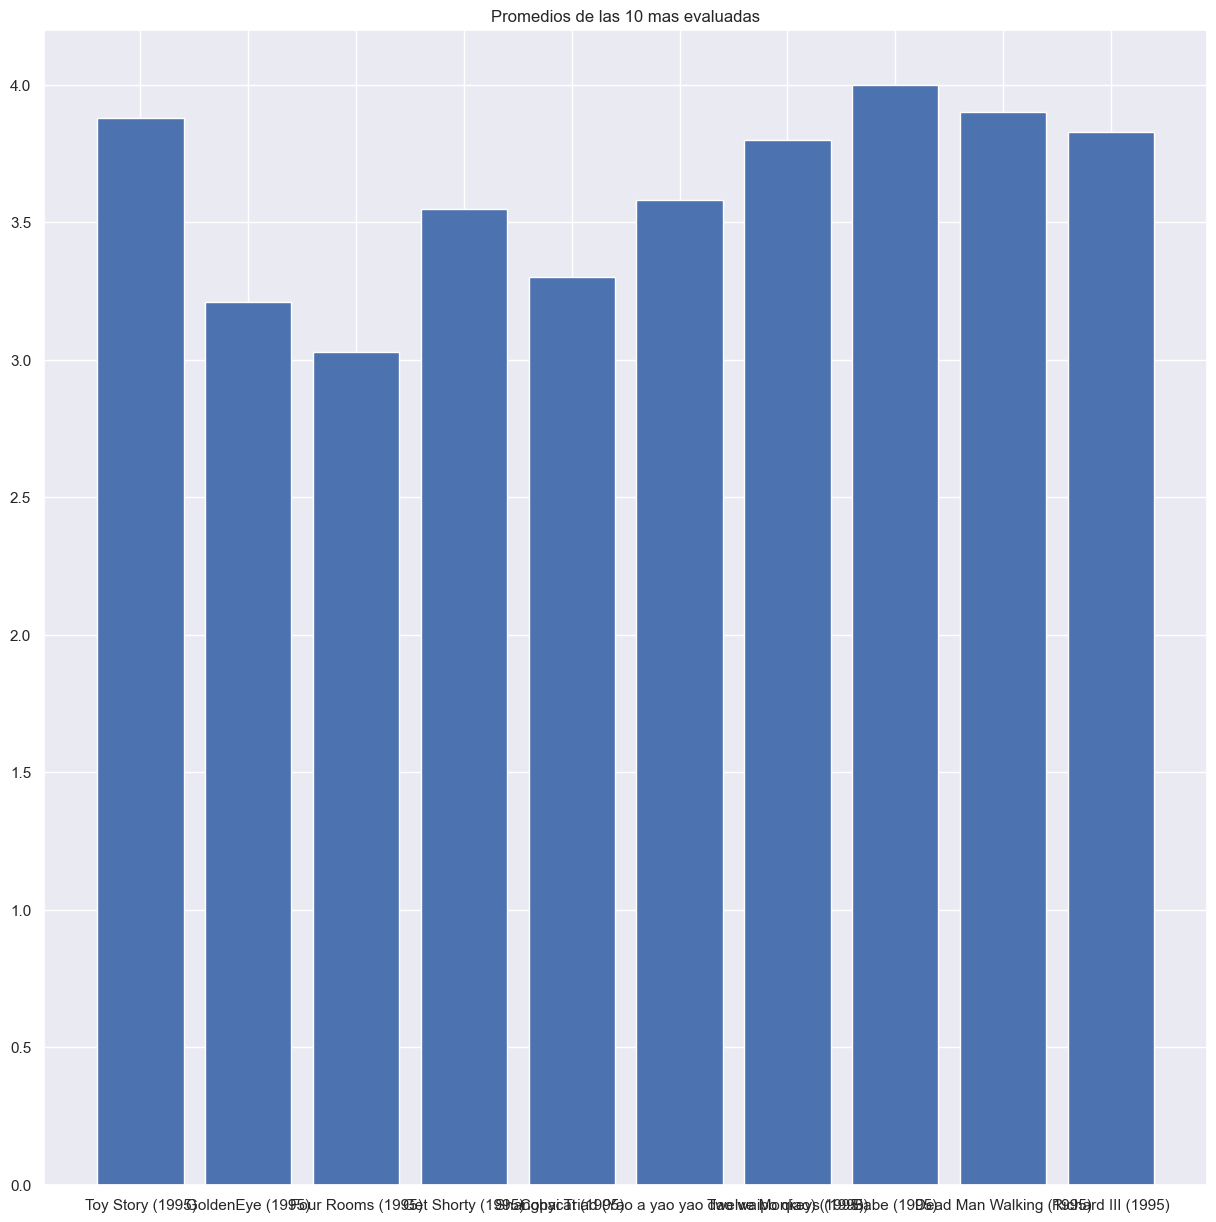

In [166]:
average_rating = {movie:round(sum(clients_movies.iloc[i, 1:])/evaluation_counter[i+1],2)
                  for i,movie in enumerate(clients_movies.movie)}

best10_movies = evaluation_counter_sorted[:10]
best10_movies_labels = [movies.name.values[best10_movies[i][0]-1]
                       for i in range(0,10)]

best10_movies_average = [average_rating[name] for name in best10_movies_labels]

figure,axis = plt.subplots(figsize=(15,15))
plt.title("Promedios de las 10 mas evaluadas")
axis.bar(best10_movies_labels,best10_movies_average)

plt.show()


- Paso 9: Calcula e imprime los estadísticos (min, max, promedio, desv estándar) de número de evaluaciones realizadas por tipo de usuario (programadores, cientìficos, etc.)

In [201]:
kind_labels = client.profession.unique()

#evaluation_per_user_kind = {
#    kind:sum(to_sum)
#for kind in kind_labels
#for client_id,to_sum in client[client.profession == kind],len(rating[rating.id_client == client_id])
#}

evaluation_per_user_kind = {}

for kind in kind_labels:
    persons = []
    for client_id in client[client.profession == kind].id:
        persons.append(len(rating[rating.id_client == client_id]))
    evaluation_per_user_kind[kind] = persons

    print("Statistics for ",kind)

    print('min: ',min(persons))
    print('max: ',max(persons))

    print("average: ", round(sum(persons)/len(persons),4))
    print("std: ",round(st.stdev(persons),4))
    print()



#evaluation_per_user_kind
#kind_df.describe()

Statistics for  technician
min:  20
max:  326
average:  129.8519
std:  91.2565

Statistics for  other
min:  20
max:  365
average:  101.5524
std:  83.7573

Statistics for  writer
min:  20
max:  388
average:  123.0222
std:  106.7319

Statistics for  executive
min:  20
max:  435
average:  106.3438
std:  99.3701

Statistics for  administrator
min:  20
max:  403
average:  94.6709
std:  89.7749

Statistics for  student
min:  20
max:  518
average:  112.0255
std:  103.7481

Statistics for  lawyer
min:  22
max:  405
average:  112.0833
std:  120.1888

Statistics for  educator
min:  20
max:  636
average:  99.3895
std:  111.2701

Statistics for  scientist
min:  20
max:  206
average:  66.3871
std:  46.9657

Statistics for  entertainment
min:  20
max:  388
average:  116.3889
std:  111.3855

Statistics for  programmer
min:  20
max:  434
average:  118.197
std:  98.8673

Statistics for  librarian
min:  20
max:  333
average:  103.3922
std:  92.6

Statistics for  homemaker
min:  24
max:  105
average:  42

- Paso 10: Realiza una gráfica que tenga tantos boxplot como tipo de usuarios. Cada boxplot debe representar los números de evaluaciones de esos tipos de usuarios.

/var/folders/m5/pp79wq4x63b092l44n69q7d40000gn/T/ipykernel_17121/1304304265.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure,axis = plt.subplots(figsize=(10,10))


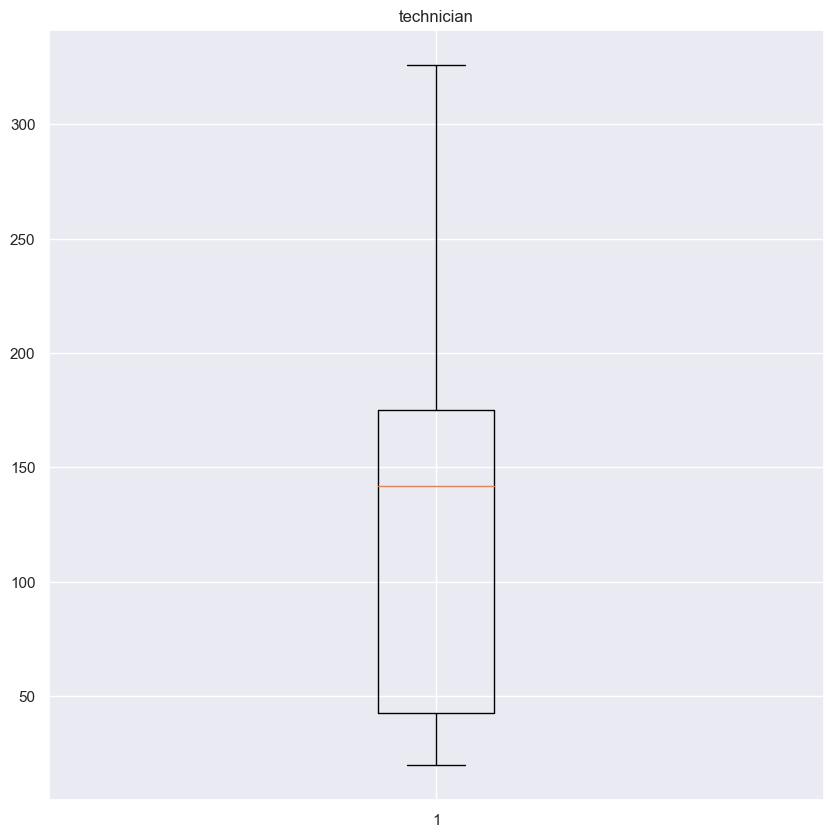

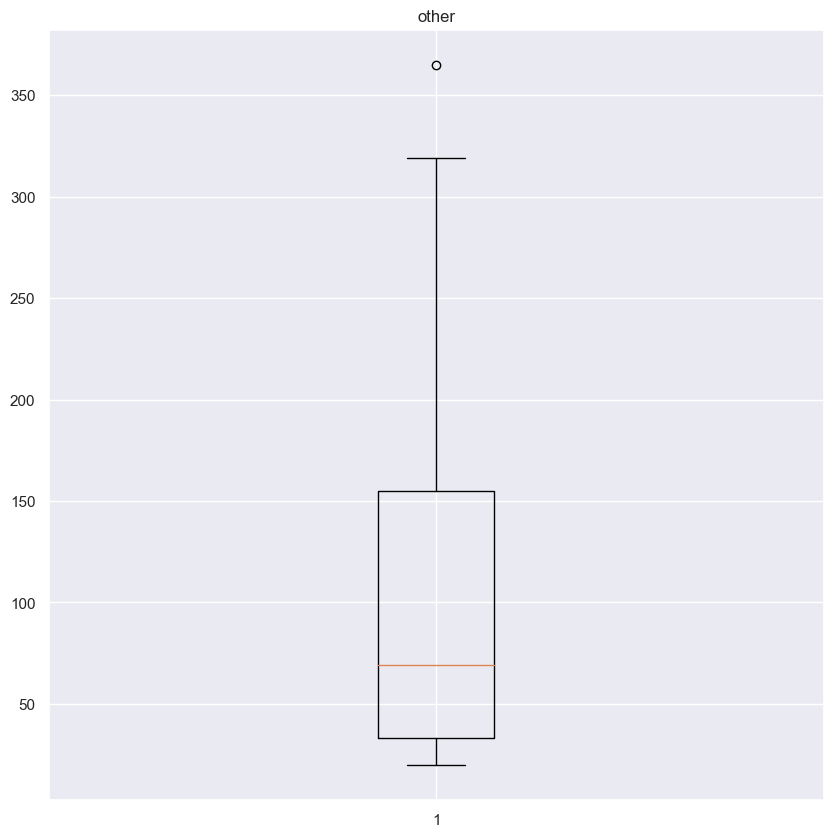

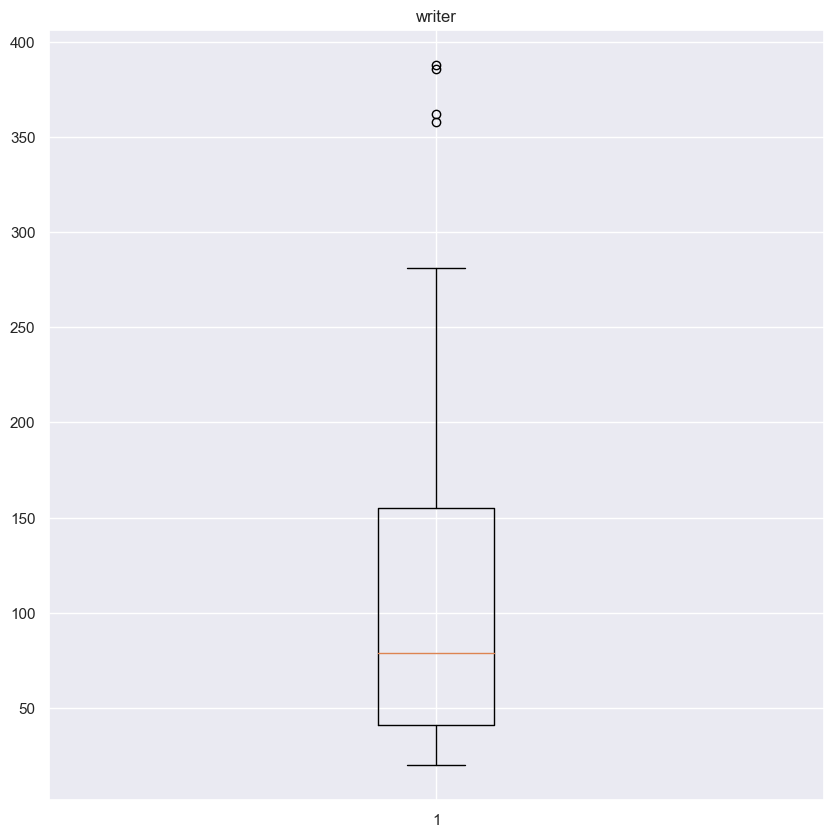

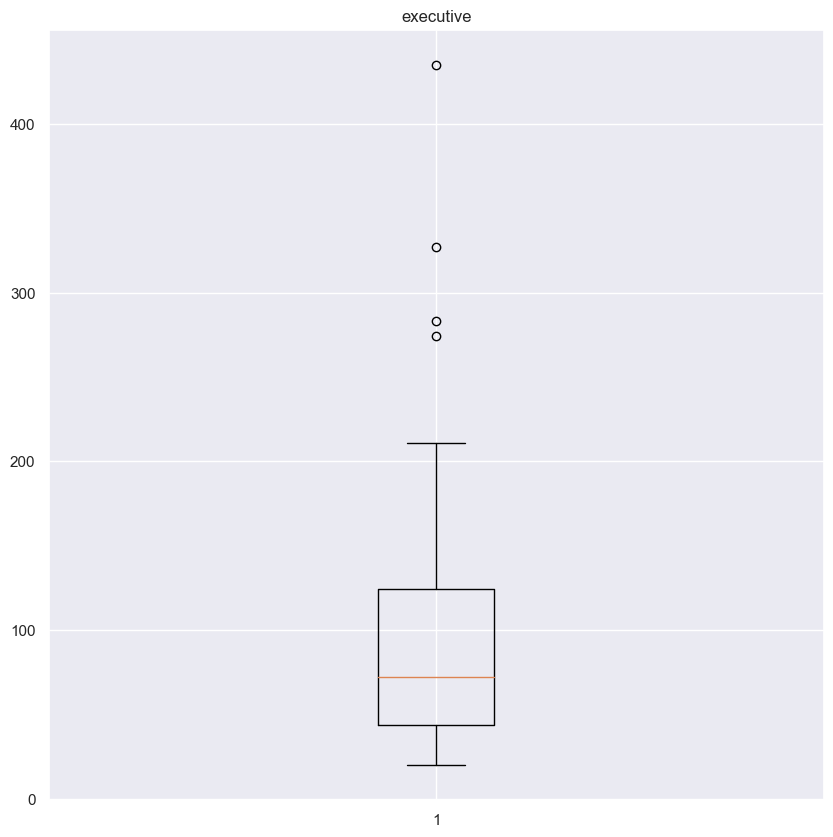

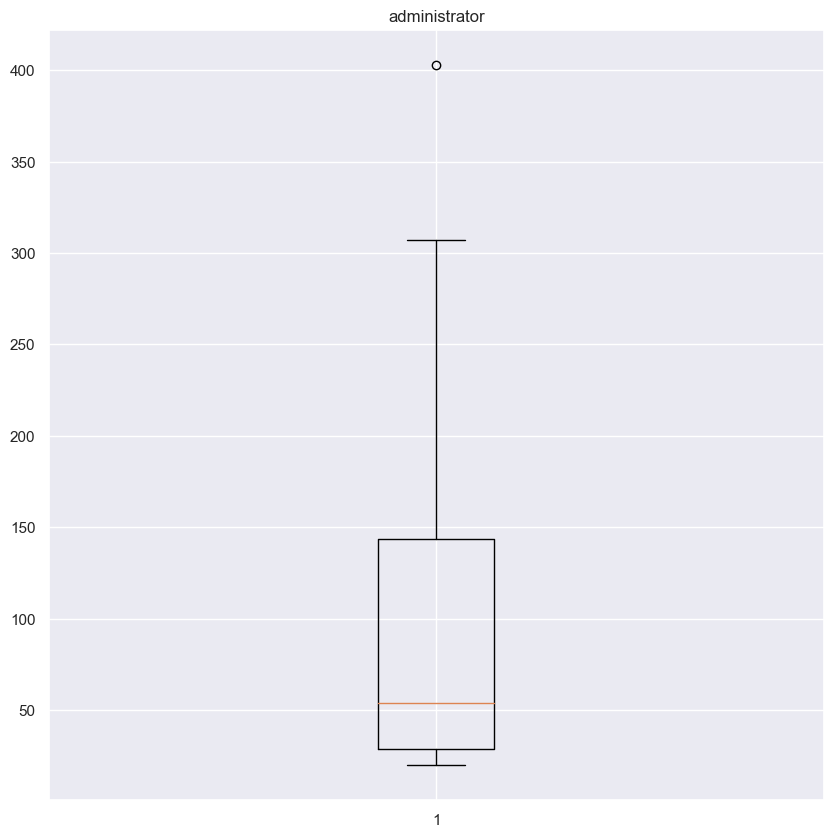

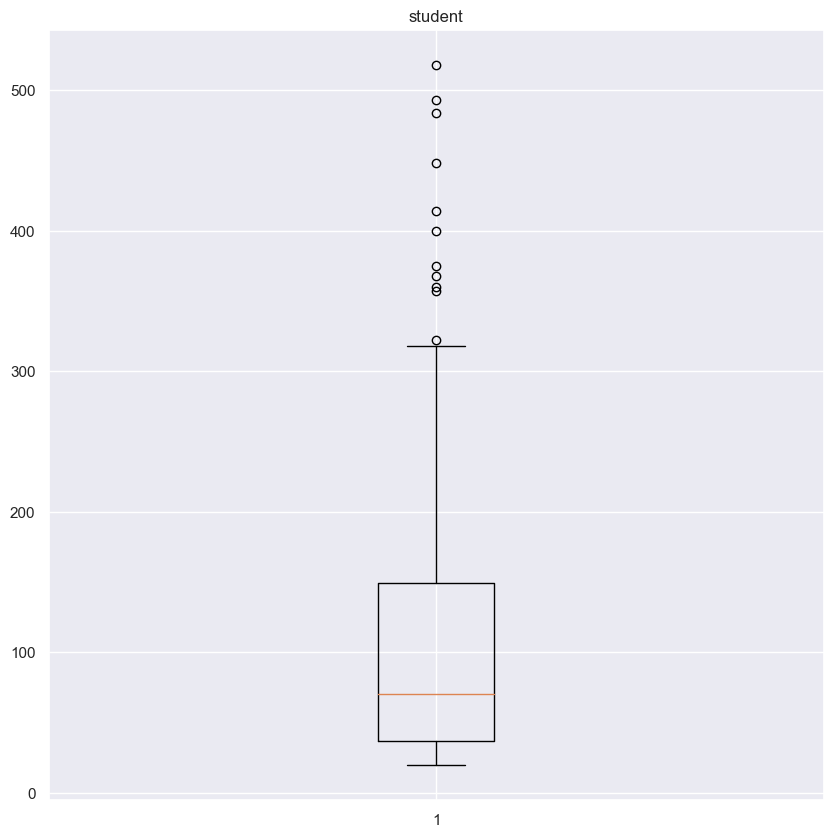

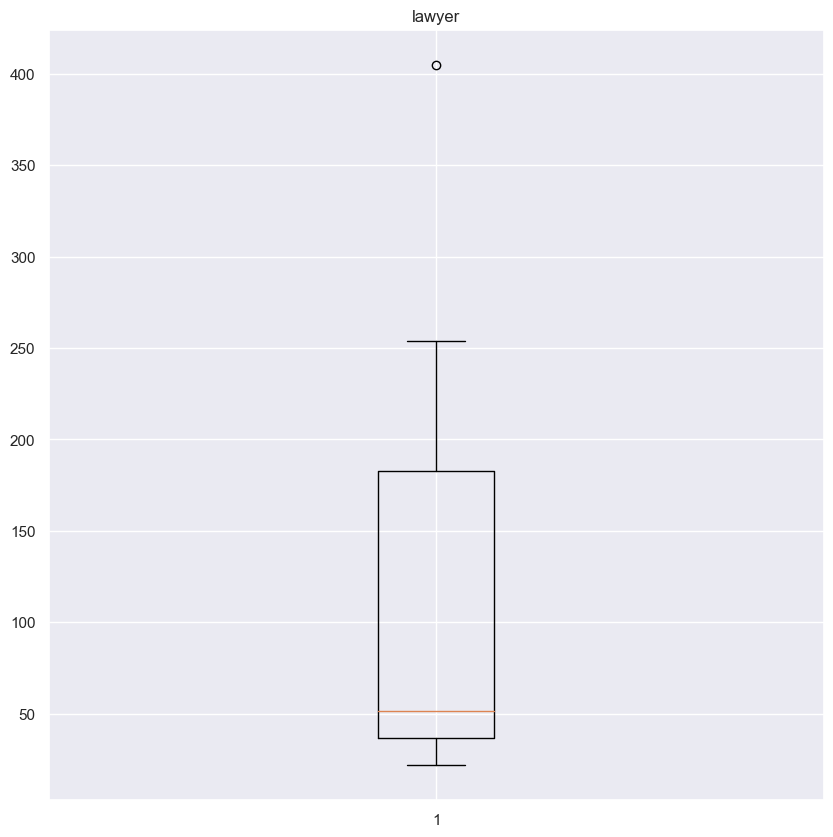

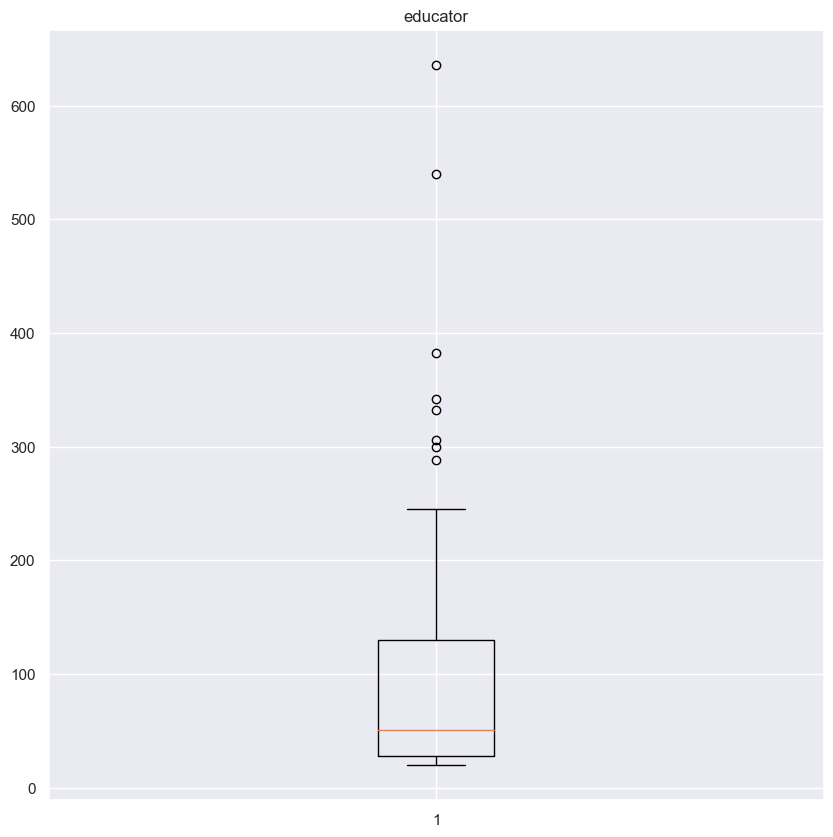

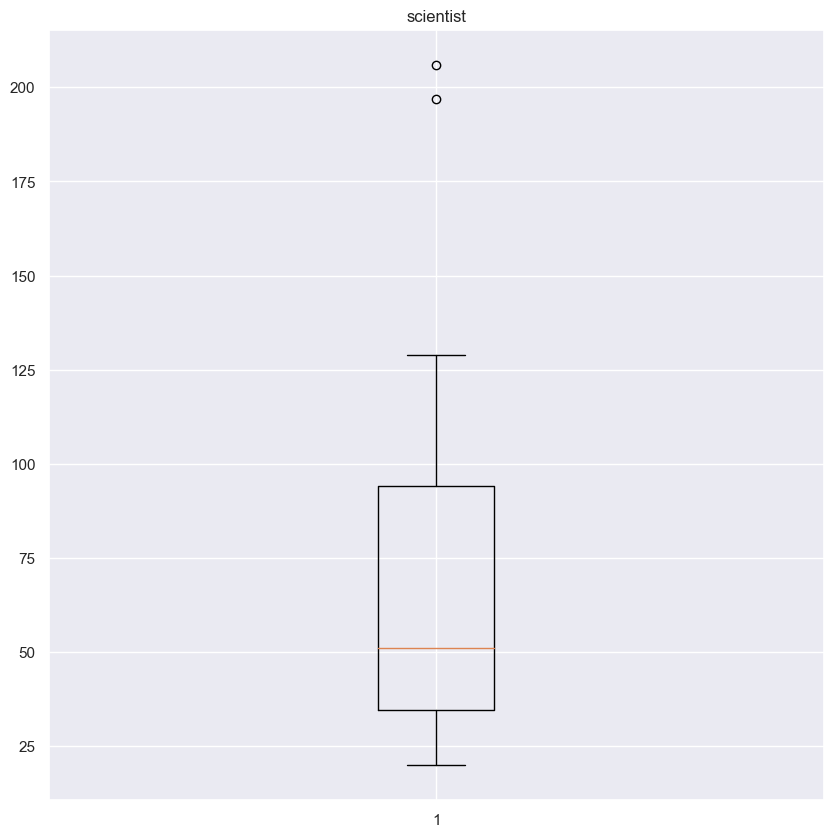

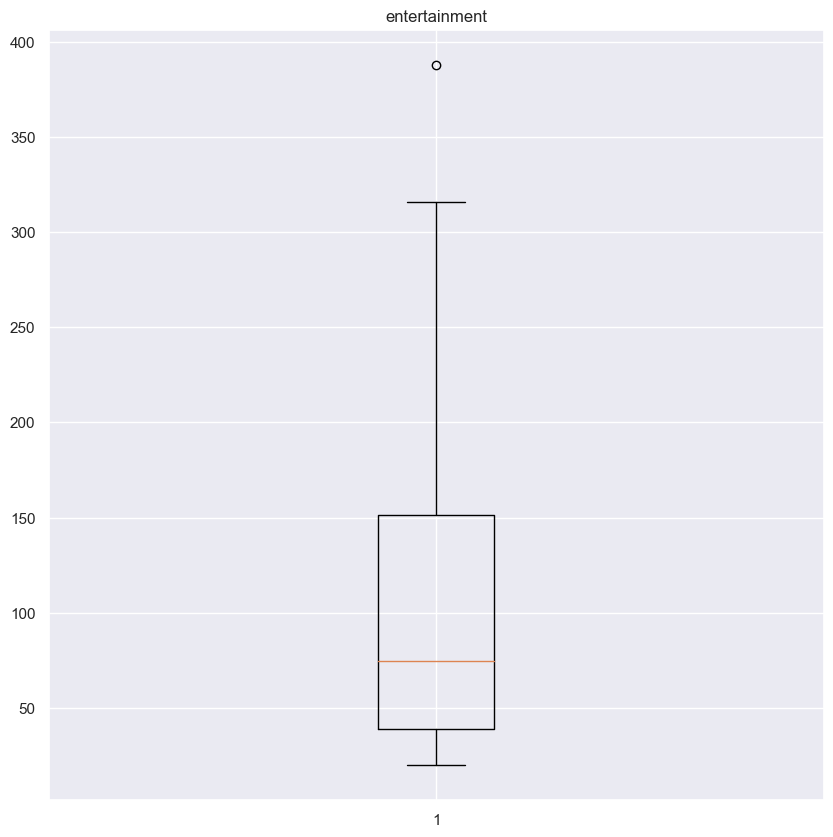

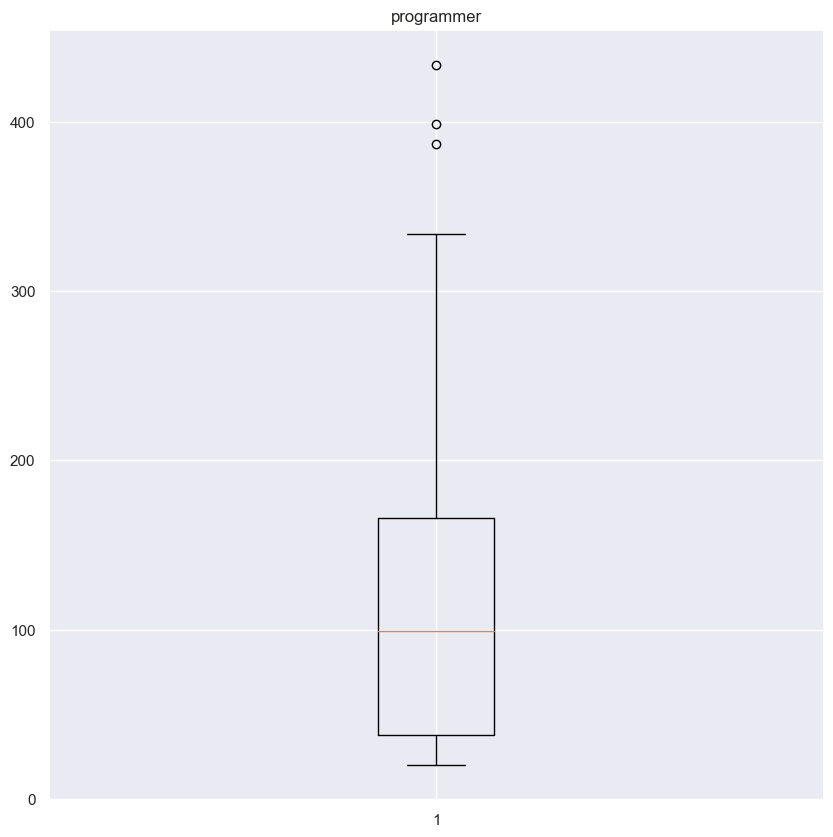

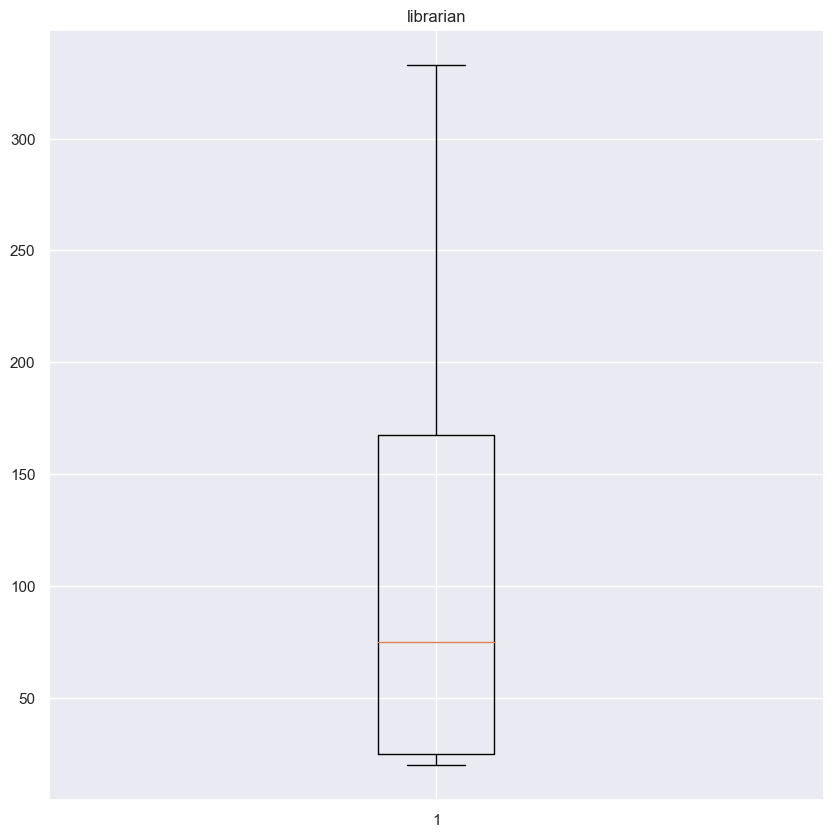

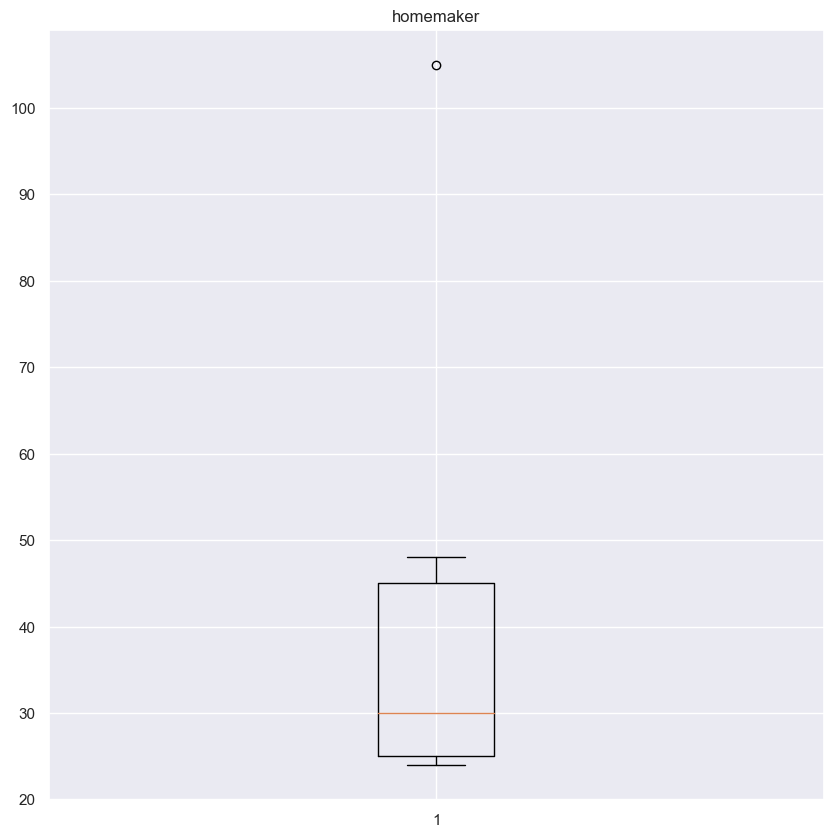

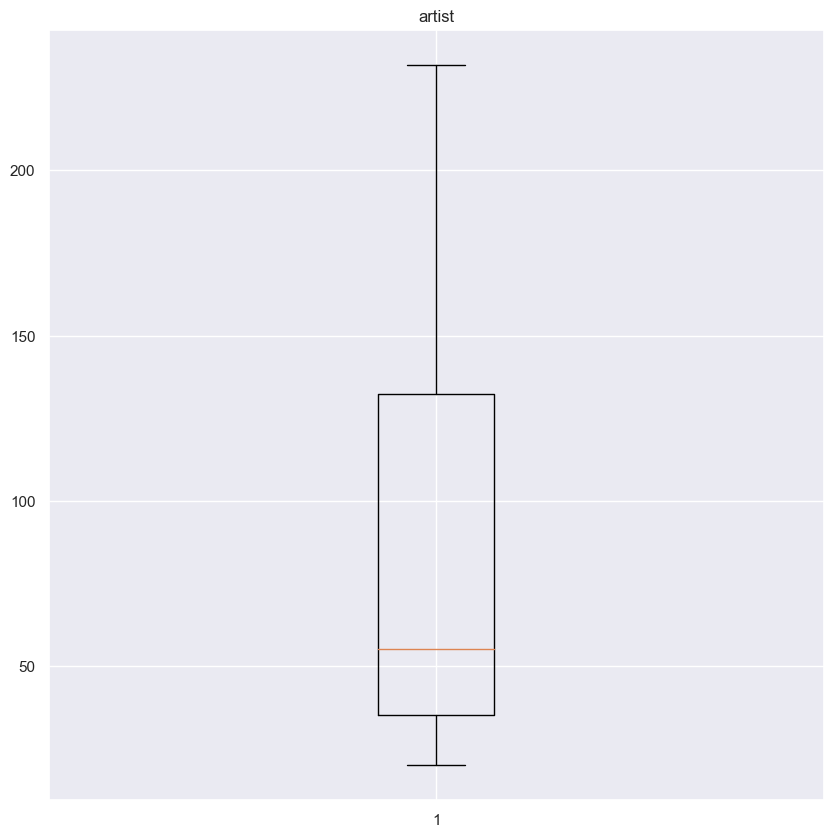

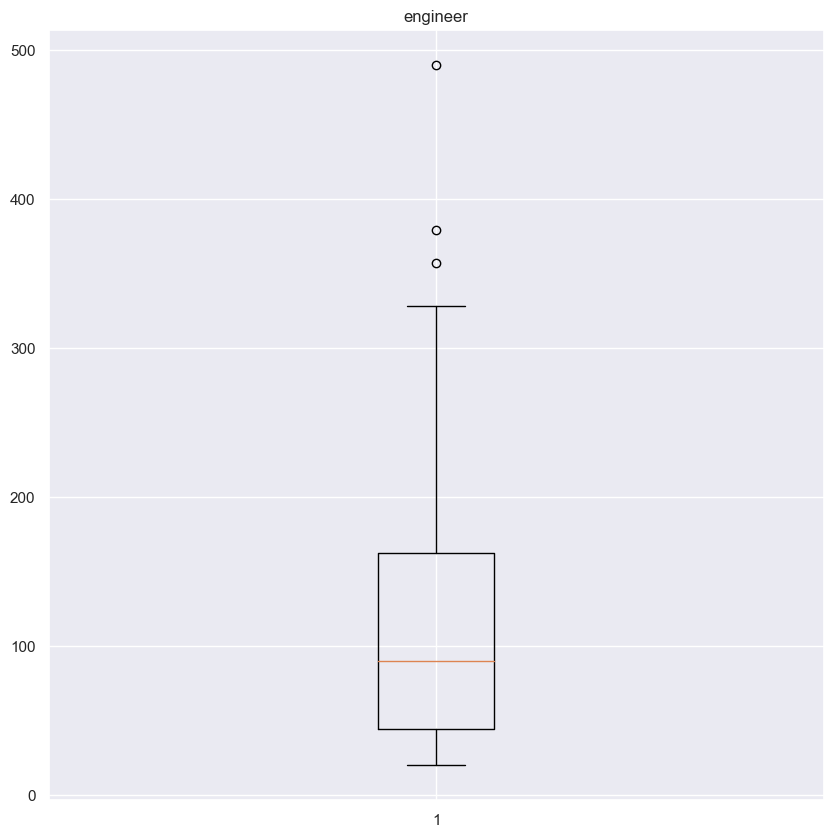

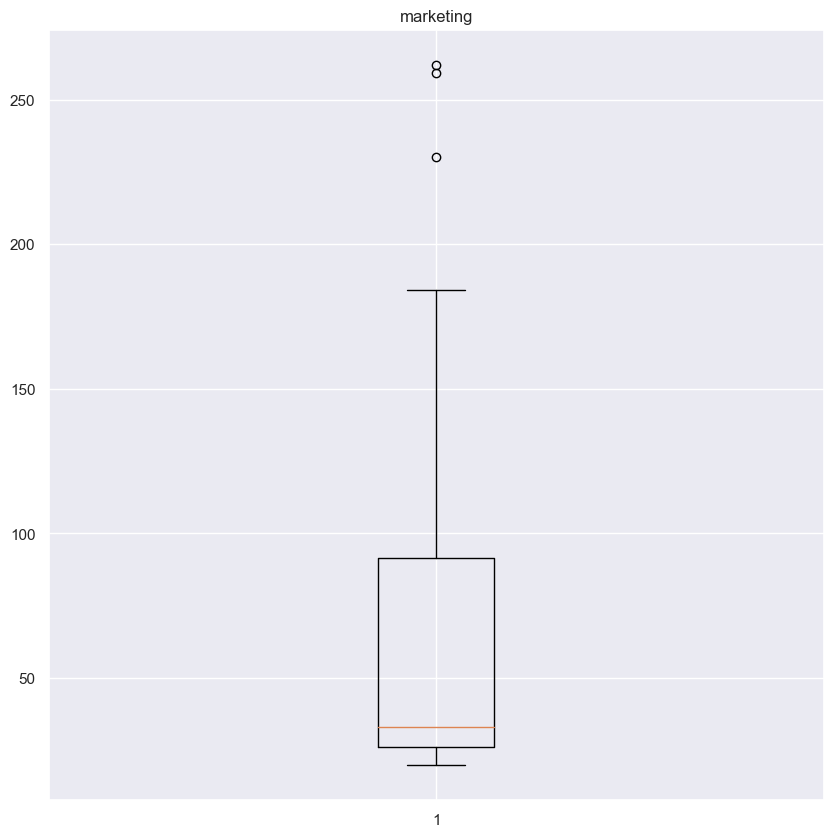

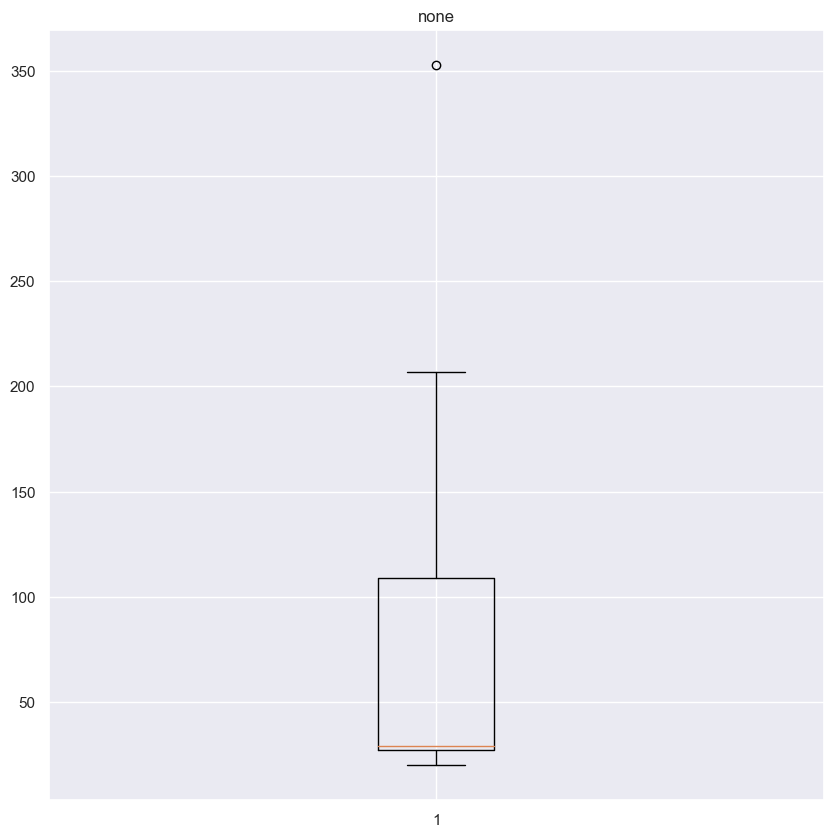

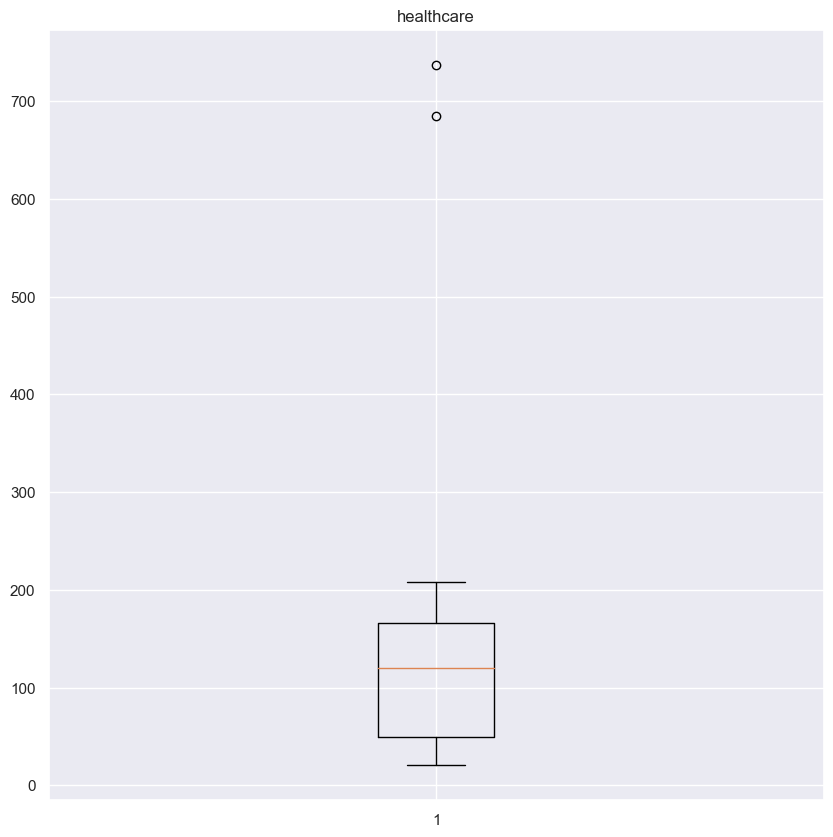

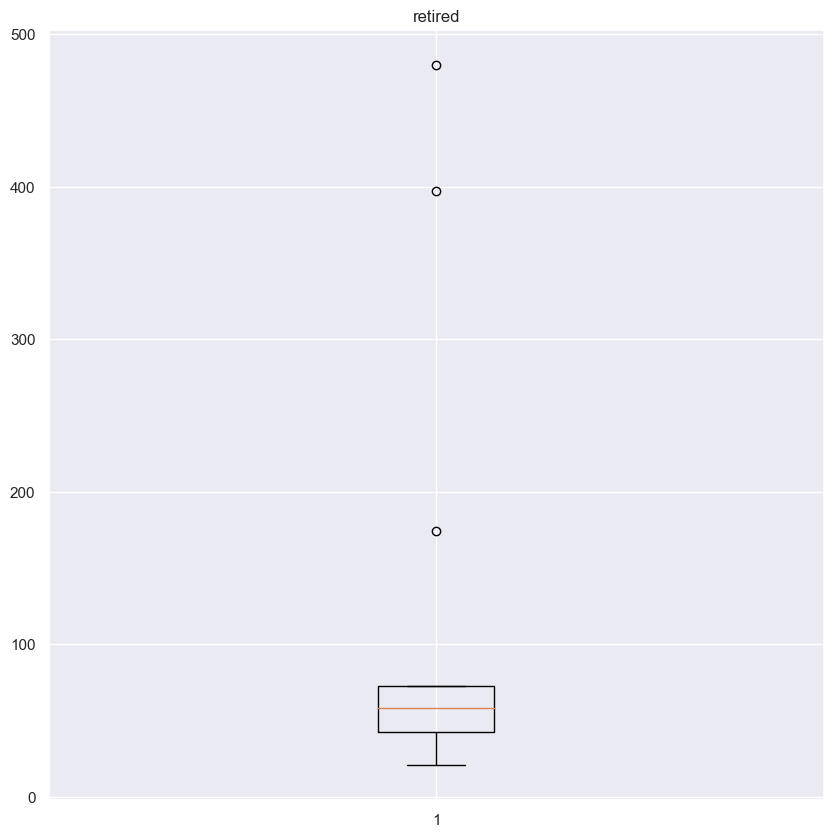

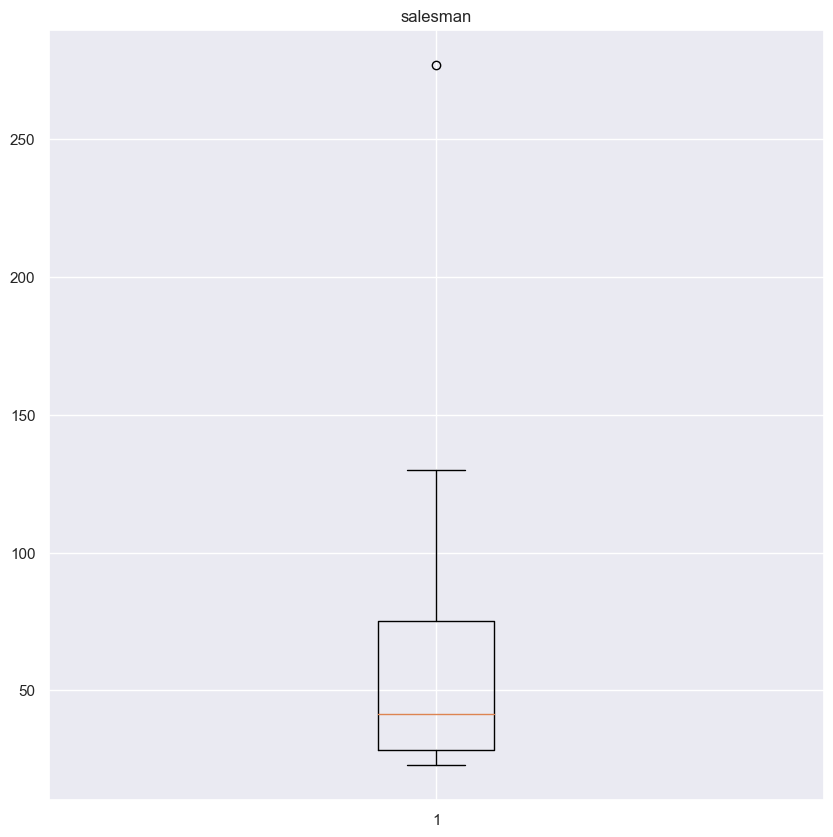

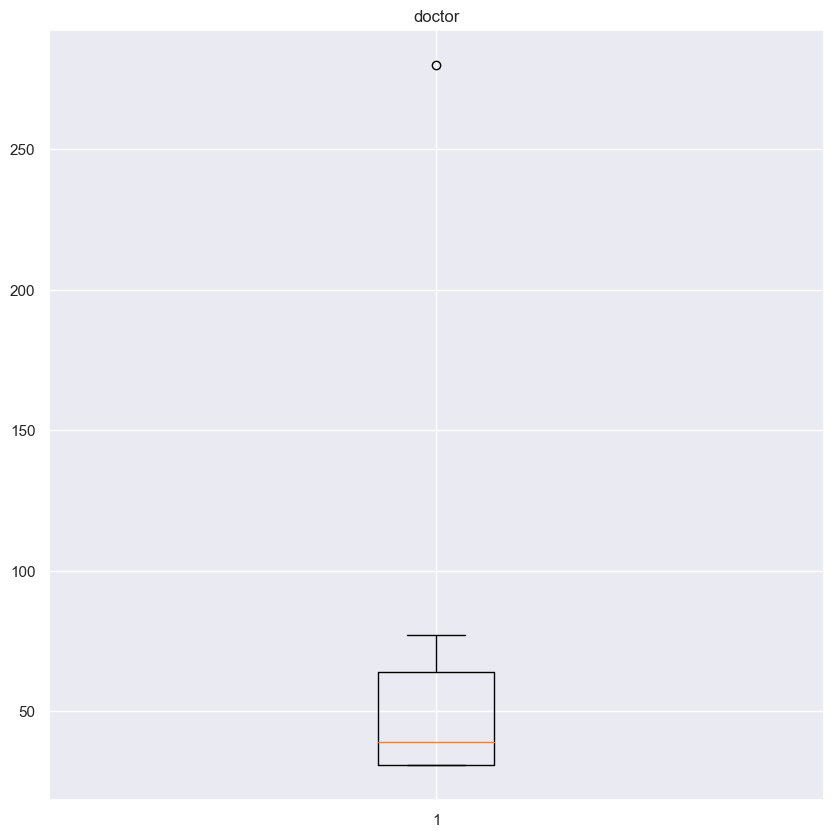

In [205]:
for kind in kind_labels:
    figure,axis = plt.subplots(figsize=(10,10))
    plt.title(kind)
    axis.boxplot(evaluation_per_user_kind[kind])
plt.show()

- Desde tu punto de vista, ¿Cuáles son las peliculas que más les gustan a los usuarios? Indica que valores numéricos o gráficas sustentan tu respuesta.

Schindler's List, Close Shave.A, Some Mother's Son, Pather Panchali, The Dorothy Day Story, y tal vez Toy Story.
Mi respuesta se sustenta en la gráfica de los 5 mejores promedios, aunque cabe destacar que "talvez" incluyo a Toy Story para ser justos con esta pelicula, ya que fue capaz de mantener un promedio decente a pesar de su enorme público (como se muestra en la gráfica de los 10 promedios de las peliculas más vistas).

- Si fueras dueño de una plataforma de streaming de peliculas, ¿Cuàles son las peliculas que eliminarías del catálogo? ¿Por qué? Indica que valores numéricos o gráficas sustentan tu respuesta.

Es dificil hacer un listado por la gran cantidad de peliculas disponibles. En general, eliminaria las peliculas con pocas calificaciones como se indica en el paso 3, puesto que son cintas que no llaman la atencion ni para bien, ni para mal, y que solo ocupan espacio de almacenamiento. Para responder de mejor manera a esta pregunta, talvez hizo falta una grafica que nos mostrara la cantidad de evaluaciones de las X peores peliculas en cuanto a promedio, no necesariamente se eliminarian todas las peliculas de esta lista, solo se removerian aquellas cintas que puedan causar mala impresion de la plataforma (vease el ejemplo de "the kissing booth" o "cuties" de netflix), mientras que se quedarian las "malas peliculas" que de alguna manera trascienden y siguen atrayendo al publico no por el gusto de verlas, sino, por el morbo de verlas (vease el ejemplo de sharknado)
